In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('E:\machine\MachineLearning\DataSets\CleanupData.csv')

In [3]:
data.head()

,State,Age,Pocket Money,Course Purchased
0,Delhi,34.0,7200.0,No
1,Mumbai,17.0,4800.0,Yes
2,Banglore,20.0,5400.0,No
3,Mumbai,28.0,6100.0,No
4,Banglore,30.0,NaN,Yes


In [4]:
X = data.iloc[:,0:3].values

In [5]:
y = data.iloc[:,3].values

In [6]:
X

array([['Delhi', 34.0, 7200.0],
       ['Mumbai', 17.0, 4800.0],
       ['Banglore', 20.0, 5400.0],
       ['Mumbai', 28.0, 6100.0],
       ['Banglore', 30.0, nan],
       ['Delhi', 25.0, 5800.0],
       ['Mumbai', nan, 5200.0],
       ['Delhi', 38.0, 7900.0],
       ['Banglore', 40.0, 8300.0],
       ['Delhi', 27.0, 6700.0]], dtype=object)

In [7]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [8]:
#handling missing values
from sklearn.preprocessing import Imputer

In [9]:
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)

In [10]:
imputer.fit(X[:,1:3])

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [11]:
X[:,1:3] = imputer.transform(X[:,1:3])

In [12]:
X

array([['Delhi', 34.0, 7200.0],
       ['Mumbai', 17.0, 4800.0],
       ['Banglore', 20.0, 5400.0],
       ['Mumbai', 28.0, 6100.0],
       ['Banglore', 30.0, 6377.777777777777],
       ['Delhi', 25.0, 5800.0],
       ['Mumbai', 28.77777777777778, 5200.0],
       ['Delhi', 38.0, 7900.0],
       ['Banglore', 40.0, 8300.0],
       ['Delhi', 27.0, 6700.0]], dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
labelencoder = LabelEncoder()

In [15]:
X[:,0] = labelencoder.fit_transform(X[:,0])

In [16]:
X

array([[1, 34.0, 7200.0],
       [2, 17.0, 4800.0],
       [0, 20.0, 5400.0],
       [2, 28.0, 6100.0],
       [0, 30.0, 6377.777777777777],
       [1, 25.0, 5800.0],
       [2, 28.77777777777778, 5200.0],
       [1, 38.0, 7900.0],
       [0, 40.0, 8300.0],
       [1, 27.0, 6700.0]], dtype=object)

In [17]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
onehotencoder = OneHotEncoder(categorical_features=[0])

In [19]:
X = onehotencoder.fit_transform(X).toarray()

In [20]:
np.set_printoptions(suppress=True)

In [21]:
X

array([[   0.        ,    1.        ,    0.        ,   34.        ,
        7200.        ],
       [   0.        ,    0.        ,    1.        ,   17.        ,
        4800.        ],
       [   1.        ,    0.        ,    0.        ,   20.        ,
        5400.        ],
       [   0.        ,    0.        ,    1.        ,   28.        ,
        6100.        ],
       [   1.        ,    0.        ,    0.        ,   30.        ,
        6377.77777778],
       [   0.        ,    1.        ,    0.        ,   25.        ,
        5800.        ],
       [   0.        ,    0.        ,    1.        ,   28.77777778,
        5200.        ],
       [   0.        ,    1.        ,    0.        ,   38.        ,
        7900.        ],
       [   1.        ,    0.        ,    0.        ,   40.        ,
        8300.        ],
       [   0.        ,    1.        ,    0.        ,   27.        ,
        6700.        ]])

In [23]:
y = labelencoder.fit_transform(y)

In [24]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [25]:
#splitting the data into trainig and test set
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [30]:
y_train

array([1, 1, 0, 1, 0, 0, 1, 0], dtype=int64)

In [32]:
#applying feature scaling
from sklearn.preprocessing import StandardScaler

In [33]:
sc = StandardScaler()

In [34]:
X_train = sc.fit_transform(X_train)

In [35]:
X_test = sc.transform(X_test)

In [36]:
X_train

array([[-0.57735027,  1.29099445, -0.77459667, -0.59657576, -0.48807723],
       [ 1.73205081, -0.77459667, -0.77459667,  0.20479466,  0.06516562],
       [-0.57735027, -0.77459667,  1.29099445, -0.11575351, -0.20081652],
       [-0.57735027, -0.77459667,  1.29099445, -1.87876845, -1.44561294],
       [ 1.73205081, -0.77459667, -0.77459667,  1.80753552,  1.90576204],
       [-0.57735027, -0.77459667,  1.29099445,  0.00890412, -1.06259865],
       [-0.57735027,  1.29099445, -0.77459667, -0.27602759,  0.37370491],
       [-0.57735027,  1.29099445, -0.77459667,  0.84589101,  0.85247276]])

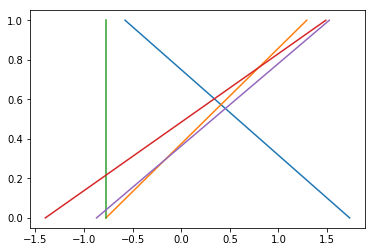

In [44]:
plt.plot(X_test,y_test)